In [ ]:
from sympy import symbols, diff, solve, simplify, Symbol, limit, oo, cos, sin, exp, sqrt, latex
from time import perf_counter
import matplotlib.pyplot as plt
import numpy as np


# Problem 1

- $\tau_{xz}(z=0) = 0$
- $u_z(z=0) = -\alpha v$
- Assumes decaying solutions at z=oo.
- This is the approach followed by Kamb (1970)

In [ ]:
t0 = perf_counter()

chi, x, z, c1, c2, c3, c4, alpha, f, v = symbols('chi, x, z, c1, c2, c3, c4, alpha, f, v ')
k = Symbol('k', positive=True)

chi = c1 * exp(-abs(k)*z) + c2 *z* exp(-abs(k)*z)
ux = diff(chi,z) + v
uz = -1j*k*chi
txz = diff(ux,z) + 1j*k*uz
txx = 2j*k*(ux-v)
tzz = 2*diff(uz,z)

BC2 = txz
BC2 = BC2.subs(z,0)
d1 = solve(BC2,c1)[0]
ux = ux.subs(c1,d1)
uz = simplify(uz.subs(c1,d1))

BC1 = uz + alpha*v
BC1 = BC1.subs(z,0)
d2 = solve(BC1, c2)[0]

ux = simplify(ux.subs(c2,d2))
uz = simplify(uz.subs(c2,d2))
tau_xz = simplify(1j*k*uz + diff(ux,z))
tau_xx = simplify(2*1j*k*(ux-v))
tau_zz = simplify(2*diff(uz,z))

px = -k**2*(ux-v) + diff(tau_xz,z)
p = px/(1j*k)
tau_1 = simplify(-alpha*p.subs(z,0))
tau_2 = simplify(tau_1.subs(k**2/abs(k),abs(k)))
# #tau2 = simplify(tau_xz)
print(f'Solve time: {perf_counter()-t0:.2f} s')
tau_1

# Problem 2
- $\tau_{xz}(z=0) = f$
- Everything else the same as in Problem 1

In [ ]:
t0 = perf_counter()

chi, x, z, c1, c2, c3, c4, alpha, f, v = symbols('chi, x, z, c1, c2, c3, c4, alpha, f, v ')
k = Symbol('k', positive=True)

chi = c1 * exp(-abs(k)*z) + c2 *z* exp(-abs(k)*z)

ux = diff(chi,z) + v
uz = -1j*k*chi
txz = diff(ux,z) + 1j*k*uz
txx = 2j*k*(ux-v)
tzz = 2*diff(uz,z)

BC2 = txz + f
BC2 = BC2.subs(z,0)
d1 = solve(BC2,c1)[0]
ux = ux.subs(c1,d1)
uz = simplify(uz.subs(c1,d1))

BC1 = uz + alpha*v
BC1 = BC1.subs(z,0)
d2 = solve(BC1, c2)[0]

ux = simplify(ux.subs(c2,d2))
uz = simplify(uz.subs(c2,d2))
tau_xz = simplify(1j*k*uz + diff(ux,z))
tau_xx = simplify(2*1j*k*(ux-v))
tau_zz = simplify(2*diff(uz,z))

px = -k**2*(ux-v) + diff(tau_xz,z)
p = px/(1j*k)
tau_1 = simplify(-alpha*p.subs(z,0))
# tau_2 = simplify(tau_1.subs(k**2/abs(k),abs(k)))
# #tau2 = simplify(tau_xz)
print(f'Solve time: {perf_counter()-t0:.2f} s')
tau_1

# Problem 3

Linearize at the end?

In [ ]:
t0 = perf_counter()

chi, k, z, c1, c2, c3, c4, B, f, v, H = symbols('chi, k, z, c1, c2, c3, c4, B, f, v, H')
k,v,H,B,Hk = symbols('k,v,H,B,Hk', positive=True)

# %ux = c1*exp(-k*z) + c3*exp(k*z)
# %uz = c2*exp(-k*z) + c4*exp(k*z)

chi = c1 * exp(-k*z) + c2 *z* exp(-k*z) + c3 * exp( k*z) + c4 *z* exp( k*z)
ux = diff(chi,z) 
uz = -1j*k*chi
txz = diff(ux,z) + 1j*k*uz
txx = 2j*k*ux
tzz = 2*diff(uz,z)
alpha = 1j*k*B

txz0 = txz.subs(z,0) + B*diff(txz,z).subs(z,0) + B**2*diff(txz,z,2).subs(z,0)
txx0 = txx.subs(z,0) + B*diff(txx,z).subs(z,0) + B**2*diff(txz,z,2).subs(z,0)
tzz0 = tzz.subs(z,0) + B*diff(tzz,z).subs(z,0) + B**2*diff(tzz,z,2).subs(z,0)
BC2 = txz0*(cos(alpha)**2 - sin(alpha)**2) + sin(alpha)*cos(alpha)*(tzz0-txx0)
# %BC2 = taylor(BC2,B,0,'order',4)
# %BC2 = txz0*(1-2*alpha**2) + alpha*(tzz0-txx0) 
# %BC2 = txz + alpha*(tzz-txx)
# %BC2 = txz0 + B*diff(txz0,z)
# %BC2 = txz-f
# %BC2 = subs(BC2,z,0)
d1 = solve(BC2,c1)[0]
ux = simplify(ux.subs(c1,d1))
uz = simplify(uz.subs(c1,d1))
print(f'{perf_counter()-t0}')

ux0 = ux.subs(z,0) + B*diff(ux,z).subs(z,0)+B**2*diff(ux,z,2).subs(z,0)
uz0 = uz.subs(z,0) + B*diff(uz,z).subs(z,0)+B**2*diff(ux,z,2).subs(z,0)
BC1 = -sin(alpha)*ux0 + cos(alpha)*uz0
# %BC1 = taylor(BC1,B,0,'order',4)
# %BC1 = -ux0*alpha + uz0*(1 - alpha**2/2)
# %BC1 = -ux0*1j*k*B + uz0
# %BC1 = subs(BC1,z,0)
d2 = solve(BC1, c2)[0]
ux = ux.subs(c2,d2)
uz = uz.subs(c2,d2)
print(f'{perf_counter()-t0}')

BC3 = ux - v
BC3 = BC3.subs(z,H)
d3 = solve(BC3,c3)[0]
ux = ux.subs(c3,d3)
uz = uz.subs(c3,d3)
print(f'{perf_counter()-t0}')

BC4 = uz
BC4 = BC4.subs(z,H)
d4 = solve(BC4,c4)[0]
ux = ux.subs(c4,d4)
uz = uz.subs(c4,d4)
print(f'{perf_counter()-t0}')

tau_xz = simplify(1j*k*uz + diff(ux,z))

tau_0 = simplify( subs(tau_xz,z,H) )
# %tau_1 = simplify( taylor(tau_0,B,0,'order',4))
tau_2 = subs(tau_0,k*H,Hk)
tau_3 = simplify(limit(tau_2,Hk,inf))

# Problem 4

- $u_x(z=0) = 0$
- $u_z(z=0) = 0$
- $u_x(z=H) = v$
- $u_z(z=H) = 0$

In [ ]:
chi, k, z, c1, c2, c3, c4, alpha, f, v, H = symbols('chi, k, z, c1, c2, c3, c4, alpha, f, v, H')
k,v,H,B,Hk = symbols('k,v,H,alpha,Hk', positive=True)

chi = c1 * exp(-k*z) + c2 *z* exp(-k*z) + c3 * exp( k*z) + c4 *z* exp( k*z)
ux = diff(chi,z) 
uz = -1j*k*chi
# ux = c1*exp(-k*z) + c3*exp(k*z)
# uz = c2*exp(-k*z) + c4*exp(k*z)
print(ux)
print(uz)



BC2 = ux
BC2 = BC2.subs(z,0)
d1 = solve(BC2,c1)[0]
ux = ux.subs(c1,d1)
uz = uz.subs(c1,d1)


BC1 = uz
BC1 = BC1.subs(z,0)
d2 = solve(BC1, c2)[0]
ux = ux.subs(c2,d2)
uz = uz.subs(c2,d2)

BC3 = ux - v
BC3 = BC3.subs(z,H)
d3 = solve(BC3,c3)[0]
ux = ux.subs(c3,d3)
uz = uz.subs(c3,d3)

BC4 = uz
BC4 = BC4.subs(z,H)
d4 = solve(BC4,c4)[0]
ux = ux.subs(c4,d4)
uz = uz.subs(c4,d4)

tau_xz = simplify(1j*k*uz + diff(ux,z))

# tau_0 = tau_xz.subs(z,H)
# %tau_1 = simplify( taylor(tau_0,B,0,'order',4))
# tau_2 = tau_0.subs(k*H,Hk)
# tau_3 = limit(tau_2,Hk,oo)
# tau_3
simplify(tau_xz)

# Problem 5
- Assume decaying solution at infinity.

In [ ]:
chi, k, z, c1, c2, c3, c4, B, f, v, H = symbols('chi, k, z, c1, c2, c3, c4, B, f, v, H')
k,v,H,B,Hk,v_R = symbols('k,v,H,alpha,Hk,v_R', positive=True)
t0 = perf_counter()

chi = c1 * exp(-abs(k)*z) + c2 *z* exp(-abs(k)*z)
ux = v + diff(chi,z)
uz = -1j*k*chi
txz = diff(ux,z) + 1j*k*uz
txx = 2j*k*(ux-v)
tzz = 2*diff(uz,z)
alpha = 1j*k*B

#nx = -sin(alpha)
#ny = cos(alpha)
nx = - alpha / sqrt(alpha**2 + 1)
ny = 1 / sqrt(alpha**2 + 1)

txz0 = txz.subs(z,0) + B*diff(txz,z).subs(z,0) + B**2*diff(txz,z,2).subs(z,0)/2
txx0 = txx.subs(z,0) + B*diff(txx,z).subs(z,0) + B**2*diff(txz.subs(z,2),z,0)/2
tzz0 = tzz.subs(z,0) + B*diff(tzz,z).subs(z,0) + B**2*diff(tzz.subs(z,2),z,0)/2
BC2 = txz0*(ny**2 - nx**2) - nx*ny*(tzz0-txx0) - f
d1 = solve(BC2,c1)[0]
ux = ux.subs(c1,d1)
uz = uz.subs(c1,d1)
print(f'{perf_counter()-t0}')

ux0 = ux.subs(z,0) + B*diff(ux,z).subs(z,0) + B**2*diff(ux,z,2).subs(z,0)/2
uz0 = uz.subs(z,0) + B*diff(uz,z).subs(z,0) + B**2*diff(ux,z,2).subs(z,0)/2
BC1 = nx*ux0 + ny*uz0 - v_R
#BC1 = taylor(BC1,B,0,'order',4)
#BC1 = -ux0*alpha + uz0*(1 - alpha**2/2)
#BC1 = -ux0*1j*k*B + uz0
#BC1 = subs(BC1,z,0)
d2 = solve(BC1, c2)[0]
ux = ux.subs(c2,d2)
uz = uz.subs(c2,d2)
print(f'{perf_counter()-t0}')

tau_xz = 1j*k*uz + diff(ux,z)
tau_0 = tau_xz.series(B,x0=0,n=3)
tau = tau_0.subs(z,0)

px = -k**2*(ux-v) + diff(tau_xz,z)
px = px.subs(z,0)
p = px/(1j*k)
p_0 = p.series(B,x0=0,n=2)
tau_1 = simplify(-alpha*p_0.subs(z,0))
print(f'{perf_counter()-t0}')

The result of this approach is essentially the same as in Problem 1 but with some higher order terms.

In [ ]:
tau_1

# Problem 6

Kamb but with finite thickness, i.e.,

The finite thickness conditions:
- $\tau_{xz}(z=H) = 0$
- $\tau_{zz}(z=H) = 0$


The Kamb conditions:
- $\tau_{xz}(z=0) = 0$
- $u_z(z=0) = -\alpha v$


In [ ]:
chi, k, z, c1, c2, c3, c4, alpha, f, v, H = symbols('chi, k, z, c1, c2, c3, c4, alpha, f, v, H')
k,v,H,B,Hk = symbols('k,v,H,alpha,Hk', positive=True)

chi = c1 * exp(-abs(k)*z) + c2 *z* exp(-abs(k)*z)\
        + c3 * exp( abs(k)*z) + c4 *z* exp( abs(k)*z)
# print(chi)
ux = diff(chi,z) + v
uz = -1j*k*chi

# ux = c1*exp(-k*z) + c3*exp(k*z)
# uz = c2*exp(-k*z) + c4*exp(k*z)

# tzz(z=H) = 0
BC2 = 2*diff(uz,z).subs(z,H)
d2 = solve(BC2,c2)[0]
ux = ux.subs(c2,d2)
uz = uz.subs(c2,d2)

tau_xz = simplify(1j*k*uz + diff(ux,z))
BC1 = tau_xz.subs(z,H)
d3 = solve(BC1, c3)[0]
ux = ux.subs(c3,d3)
uz = uz.subs(c3,d3)


tau_xz = simplify(1j*k*uz + diff(ux,z))
BC3 = tau_xz.subs(z,0)
d1 = solve(BC3,c1)[0]
ux = ux.subs(c1,d1)
uz = simplify(uz.subs(c1,d1))

BC4 = uz + alpha*v
BC4 = BC4.subs(z,0)
d4 = solve(BC4, c4)[0]
ux = simplify(ux.subs(c4,d4))
uz = simplify(uz.subs(c4,d4))

tau_xz = simplify(1j*k*uz + diff(ux,z))
tau_zz = simplify(2*diff(uz,z))
tau_xx = simplify(2j*k*(ux-v))

px = -k**2*(ux-v) + diff(tau_xz,z)
p = px/(1j*k)
tau_1 = simplify(-alpha*p.subs(z,0))
# tau_2 = simplify(tau_1.subs(k**2/abs(k),abs(k)))
# #tau2 = simplify(tau_xz)
# print(tau_1)


# print(tau_zz)
# print(tau_xx)
# print(tau_xz)

# print( simplify(tau_xz / tau_xx) )
# print(ux)

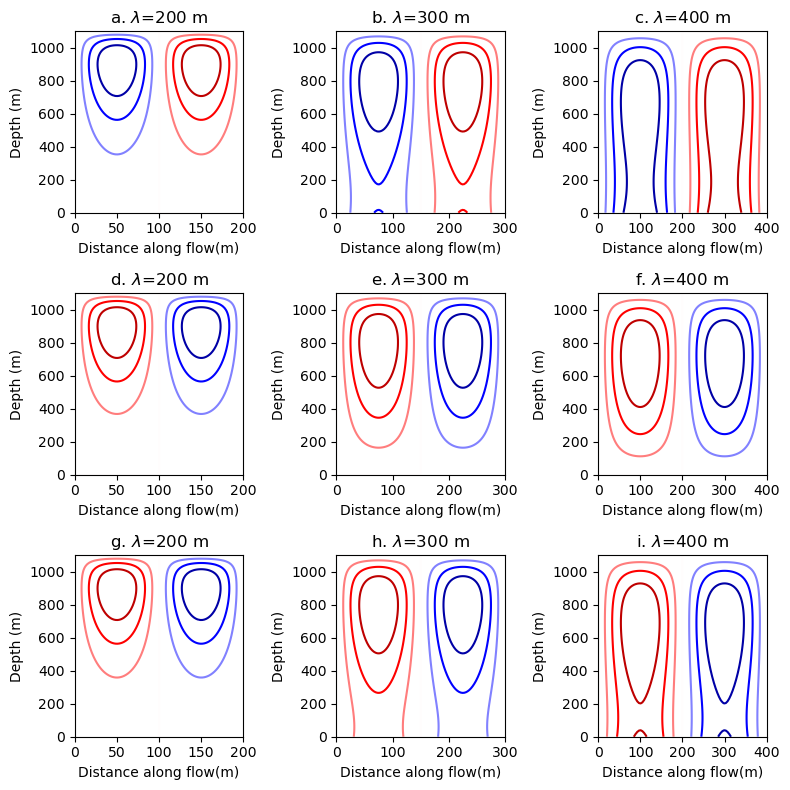

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
v = 1
H = 1100
z = np.linspace(0,H,100)
x = np.linspace(0,1,100)
X,Z = np.meshgrid(x,z)

klist = (1/200,1/300,1/400)

abc='abc'
fig,ax=plt.subplots(3,3,figsize=(8,8))
for i,k in enumerate(klist):
    plt.subplot(3,3,i+1)
    tzz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.cosh(-k*Z)

    c=plt.contour(x/k,z,tzz*np.sin(2*np.pi*X)/(np.max(np.abs(tzz))),
                     cmap='seismic',vmin=-1,vmax=1)
    plt.xlabel('Distance along flow(m)')
    plt.ylabel('Depth (m)')
    plt.title(f'{abc[i]}. $\lambda$={round(1/k)} m')

deff='def'
for i,k in enumerate( klist ):
    plt.subplot(3,3,i+4)

    txz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.sinh(-k*Z)
    c=plt.contour(x/k,z,txz*np.sin(2*np.pi*X)/(np.max(np.abs(txz))),
                     cmap='seismic',vmin=-1,vmax=1)
    plt.xlabel('Distance along flow(m)')
    plt.ylabel('Depth (m)')
    plt.title(f'{deff[i]}. $\lambda$={round(1/k)} m')

ghi='ghi'
for i,k in enumerate( klist ):
    plt.subplot(3,3,i+7)

    txz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.sinh(-k*Z)
    tzz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.cosh(-k*Z)
    
    tE = np.sqrt( (2*tzz**2 + txz**2)/2 )
    c=plt.contour(x/k,z,tE*np.sin(2*np.pi*X)/(np.max(np.abs(tE))),
                     cmap='seismic',vmin=-1,vmax=1)
    plt.xlabel('Distance along flow(m)')
    plt.ylabel('Depth (m)')
    plt.title(f'{ghi[i]}. $\lambda$={round(1/k)} m')
#     plt.axis('image')
#     plt.colorbar(c,label='Vertical strain rate, $\dot\epsilon_{zz}$')


plt.tight_layout()
plt.show()


In [ ]:
plt.subplots(figsize=(8,3))
z = np.linspace(0,H,100)
t = np.linspace(0,2.25,200)
T,Z = np.meshgrid(t,z)

k = 1/400
vm = 1e-1
txz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.sinh(-k*Z)
tzz = 2.0*alpha*k**2*v*H * (Z/H-1) * np.cosh(-k*Z)
tE = np.sqrt( (2*tzz**2 + txz**2)/2 )
tE_time = tE*np.sin(2*np.pi*T)
tE_time = tE_time - np.mean(tE_time,axis=0)
c=plt.pcolor(t,H-z,tE_time,
                 cmap='seismic',vmin=-vm,vmax=vm)
plt.ylim([1000,0])
plt.xlabel('Days')
plt.ylabel('Depth (m)')
plt.title(f'Effective stress in the vicinity of \na bedrock obstacle with wavelength $\lambda$={round(1/k)} m')
plt.grid()
plt.show()

In [ ]:
plt.plot(tE_time[50,:])